**Import libraries**

In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
# tensorflow: Core library for building deep learning models.
# keras: High-level API for TensorFlow.
# numpy: For numerical operations.
# matplotlib: For visualizing data and metrics.


**Load the Dataset**

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# CIFAR-10 is a dataset containing 60,000 32x32 images in 10 classes, with 50,000 for training and 10,000 for testing.

**Visualize Sample Images**

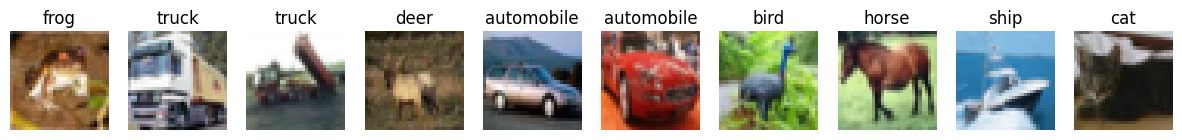

In [4]:
# Show some sample images with corresponding labels
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].set_title(class_names[y_train[i][0]])
    axes[i].axis('off')
plt.show()
# This code displays the first 10 images of the training set with their respective class labels.

**Normalize the Data**

In [5]:
# Normalize pixel values to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0
# Normalization ensures faster convergence of the model during training.

**Build Models**

In [11]:
# Build the CNN model
cnn_model = Sequential()

# Add convolutional layers
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

# Flatten and add dense layers
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

# Conv2D: Extracts spatial features from images.
# MaxPooling2D: Reduces spatial dimensions for faster computation.
# Dense: Fully connected layer for classification.
# Dropout: Prevents overfitting.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compile and Train the Model**

In [18]:
# Compile the Model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Optimizer: Adam optimizer adjusts weights during training.
# Loss: Sparse categorical cross-entropy for multi-class classification.

**Train the Model**

In [8]:
history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
# epochs=10: The model will go through the entire dataset 10 times.
# validation_data: Evaluate the model on test data during training.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.2896 - loss: 1.8855 - val_accuracy: 0.5174 - val_loss: 1.3136
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5101 - loss: 1.3576 - val_accuracy: 0.5824 - val_loss: 1.1484
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5762 - loss: 1.1878 - val_accuracy: 0.6203 - val_loss: 1.0731
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6249 - loss: 1.0621 - val_accuracy: 0.6505 - val_loss: 0.9996
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6553 - loss: 0.9859 - val_accuracy: 0.6610 - val_loss: 0.9569
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6846 - loss: 0.9096 - val_accuracy: 0.6828 - val_loss: 0.9061
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7090 - loss: 0.8398 - val_accuracy: 0.6854 - val_loss: 0.9032
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7200 -

**Evaluate the Model**

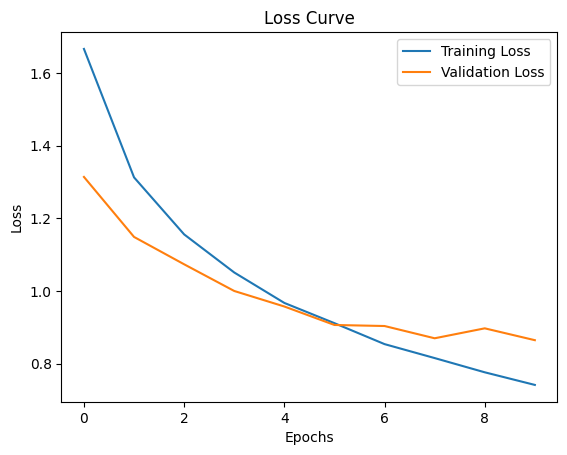

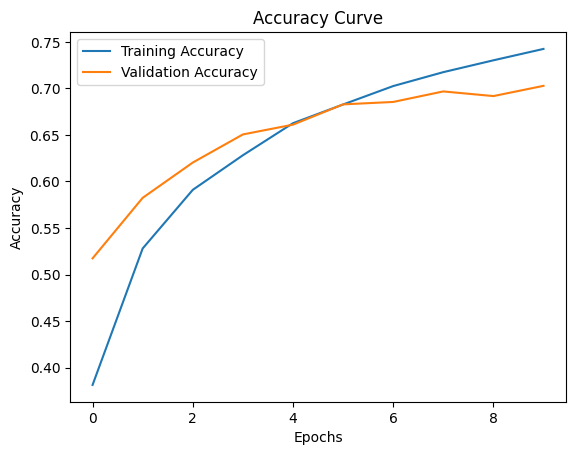

In [9]:
# Plot Loss and Accuracy
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



**Evaluate on Test Data**

In [10]:
# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7016 - loss: 0.8569
Test Accuracy: 70.27%


**Save and Load the Model**

In [16]:
# Save the Model
# cnn_model.save('cifar10_cnn_model.h5')
model.save('cifar10_cnn_model.keras')  # Save in the new format
loaded_model = tf.keras.models.load_model('cifar10_cnn_model.keras')  # Load the model


**Load the Model**

In [19]:
loaded_model = tf.keras.models.load_model('cifar10_cnn_model.keras')


**Test on Custom Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


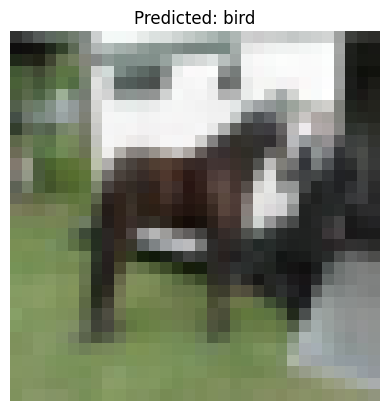

In [20]:
# Prediction on a New Image
# Predict a test image
index = 20  # Choose an index
sample_image = np.expand_dims(x_test[index], axis=0)

predictions = loaded_model.predict(sample_image)
predicted_class = np.argmax(predictions)

plt.imshow(x_test[index])
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()
